In [1]:
%load_ext autoreload
%autoreload 2
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"

In [14]:
dpe = DPE('COM3')
dpe.set_clock(50)

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


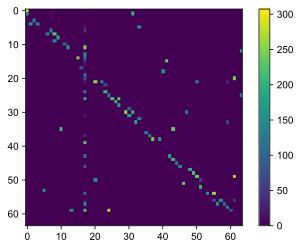

In [15]:
g = dpe.read(0, Tdly=0)
plt.imshow(g * 1e6)
plt.colorbar()

In [12]:
Vset = np.ones((64,64)) * 0.1
Vgate = np.ones((64,64)) * 0.1

Vset[:3,:3] = 0

Vgate[61:,61:] = 0

In [19]:
with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)
    dut = dpe.a0.dut
    dpe.a0.pic_write_batch(Vset, Vgate, mode=0)